In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [3]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [4]:
# 2. DEFENDERS

# 2.1 centre backs

# find the best centre backs in the game

# get all the cbs from the dataset
df_cb = df.loc[df['player_positions'].str.contains("CB", case = True)]
df_cb = df_cb.reset_index(drop = True)

df_cb

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,V. van Dijk,28,Netherlands,Liverpool,90,91,75500000,210000,CB,Medium/Medium,...,92,64,83,90,47,65,62,90,93,86
1,Sergio Ramos,34,Spain,Real Madrid,89,89,24500000,300000,CB,High/Medium,...,85,64,90,88,73,71,92,88,88,90
2,K. Koulibaly,29,Senegal,Napoli,88,88,50000000,140000,CB,Medium/High,...,94,15,87,87,35,52,33,82,89,87
3,A. Laporte,26,France,Manchester City,87,90,56000000,200000,CB,Medium/Medium,...,85,47,81,87,54,65,44,85,89,88
4,G. Chiellini,35,Italy,Juventus,87,87,15500000,94000,CB,Medium/High,...,87,49,90,88,28,50,50,84,90,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Zhou Xiao,21,China PR,Dalian YiFang FC,47,57,45000,2000,"CB, LB",Medium/Medium,...,55,13,45,47,33,33,27,33,46,45
3821,Xia Ao,21,China PR,Wuhan Zall,47,55,40000,1000,CB,Medium/Medium,...,50,24,48,50,28,28,38,44,52,50
3822,Wang Huapeng,20,China PR,Guangzhou R&F FC,47,53,35000,1000,CB,Low/Low,...,58,15,40,44,24,33,35,37,52,55
3823,Zhang Mengxuan,21,China PR,Chongqing Dangdai Lifan FC SWM Team,47,52,35000,1000,CB,Low/Low,...,45,23,44,50,25,25,35,40,56,47


In [5]:
for i in range(0, len(df_cb['overall'])):
    if df_cb['overall'][i] > 85:
        df_cb = df_cb.drop(i)

df_cb = df_cb.reset_index(drop=True)

# remove irrelevant columns
df_cb = df_cb.drop(['nationality', 'movement_balance', 'mentality_positioning', 'power_long_shots', 'mentality_vision', 'power_shot_power', 'passing', 'movement_agility', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_penalties', 'work_rate', 'skill_dribbling', 'shooting', 'dribbling', 'dribbling', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in keep dataset
cb = df_cb

# get the top 10 rated centrebacks according to their potential
df_cb = df_cb[0:10]

df_cb

,short_name,overall,potential,pace,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_interceptions,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,M. de Ligt,85,92,72.0,85.0,84.0,68,75,84,84,76,88,83,83,82,85,82
1,Marquinhos,85,89,72.0,87.0,78.0,70,73,85,89,80,75,80,86,86,87,87
2,C. Lenglet,85,89,74.0,87.0,81.0,76,72,84,85,75,83,80,87,82,86,81
3,M. Škriniar,85,89,69.0,87.0,81.0,70,68,83,78,73,84,86,86,81,87,83
4,Thiago Silva,85,85,59.0,86.0,78.0,57,61,81,90,71,82,76,88,86,86,84
5,D. Godín,85,85,57.0,87.0,79.0,59,55,74,89,62,85,85,87,80,86,84
6,T. Alderweireld,85,85,63.0,87.0,79.0,60,65,85,82,78,79,81,85,86,89,85
7,L. Bonucci,85,85,60.0,87.0,77.0,58,62,84,85,66,79,82,90,86,86,80
8,N. Süle,84,89,69.0,85.0,81.0,52,83,81,38,63,93,83,81,75,88,87
9,J. Giménez,84,88,67.0,86.0,83.0,65,69,79,90,64,90,89,85,75,87,86


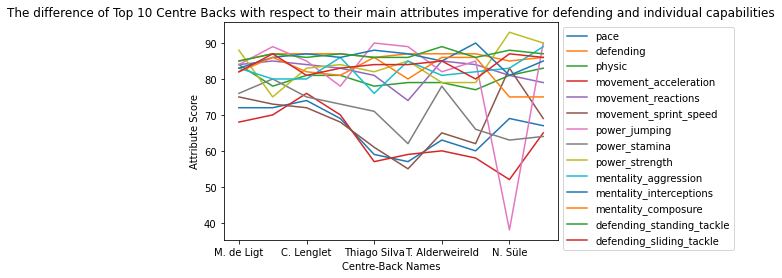

In [6]:
# plot the top 10 cbs with their most associated attributes

df_cb.plot(x = 'short_name', y = ['pace', 'defending', 'physic', 'movement_acceleration', 'movement_reactions', 'movement_sprint_speed', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle'])
plt.legend(loc = 'best')
plt.xlabel('Centre-Back Names')
plt.xticks()
plt.ylabel('Attribute Score')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("The difference of Top 10 Centre Backs with respect to their main attributes imperative for defending and individual capabilities")
plt.show()

In [7]:
# get the cb names in names
names_cb = []
names_cb.append(df_cb['short_name'])


# work on top 3 cbs to find any similarities
ligt = df_cb.drop(["short_name", "overall", "potential", 'pace', 'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions'], axis = 1).iloc[0]
vvd = df_cb.drop(["short_name", "overall", "potential", 'pace', 'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions'], axis = 1).iloc[1]
upamecano = df_cb.drop(["short_name", "overall", "potential", 'pace', 'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions'], axis = 1).iloc[2]


labels_cb = df_cb.columns.drop(['short_name', 'potential', 'overall', 'pace', 'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions'])
z = np.arange(len(labels_cb))  # the label locations
width = 0.25  # the width of the bars

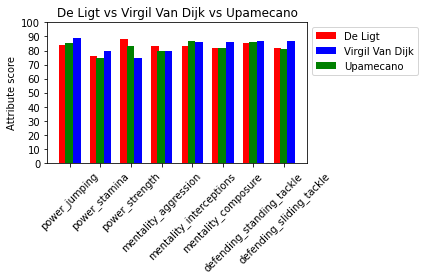

In [8]:
# plot the top 3 rated centrebacks by their potential

fig, ax = plt.subplots()
rects1 = ax.bar(z - 0.3 + width/3, ligt, width, label='De Ligt', color = 'red')
rects2 = ax.bar(z + 0.15 + width/3, vvd, width, label='Virgil Van Dijk', color = 'blue')
rects3 = ax.bar(z - 0.1 + width/3, upamecano, width, label='Upamecano', color = 'green')

y_major_ticks = np.arange(0, 110, 10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attribute score')
ax.set_xticks(z)
ax.set_xticklabels(labels_cb)
ax.set_yticks(y_major_ticks)
plt.title('De Ligt vs Virgil Van Dijk vs Upamecano', fontsize=12, ha='center')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

In [9]:
names_cb = pd.DataFrame(cb['short_name'])
cb = cb.drop('short_name', axis = 1)
cb = cb.drop('potential', axis = 1)

cb_norm = (cb - cb.mean())/cb.std()

In [10]:
# use Linear Regression to predict the overall of centre backs
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
cb_x = cb_norm.drop('overall', axis = 1)
cb_w = cb_norm['overall']

lm.fit(cb_x,cb_w)
yhat = lm.predict(cb_x)
print(lm.intercept_)
print(lm.coef_)

-1.6036680598941637e-15
[-0.01372983  0.53514452 -0.03793436  0.02477282  0.06128627  0.13186179
  0.02032592  0.05745008  0.11653171  0.12134199  0.05088865  0.07398355
  0.03778687  0.04802595]


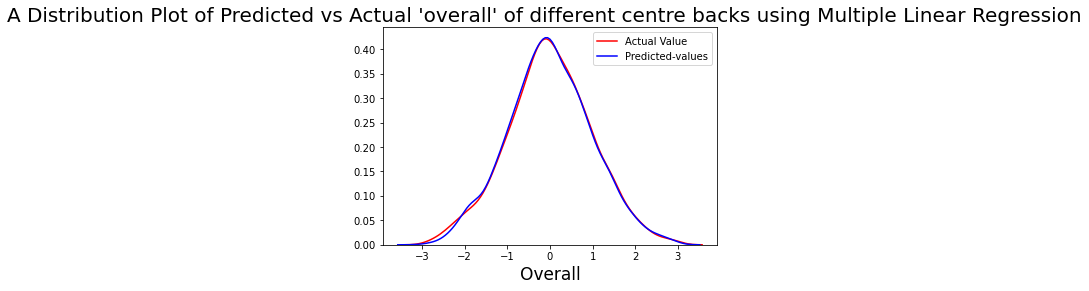

In [18]:
# plot the distribution for actual and predicted values

ax1 = sns.distplot(cb_norm['overall'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = 'Predicted-values', ax = ax1)
plt.figtext(.5, .9, "A Distribution Plot of Predicted vs Actual 'overall' of different centre backs using Multiple Linear Regression", fontsize = 20, ha = 'center')
plt.xlabel("Overall", fontsize = 17)
plt.show()


In [11]:
# get the actual and predicted table for centrebacks
avp = pd.DataFrame({'Actual' : cb_w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(names_cb['short_name'])

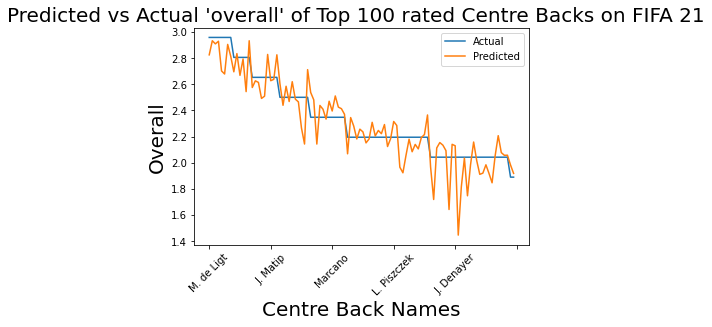

In [12]:
# plot the actual vs predicted of top 100 rated centre-backs according
# to their potential

add_names[0:100].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 100 rated Centre Backs on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Centre Back Names', fontsize = 20)
plt.xticks(rotation=45)
plt.ylabel('Overall', fontsize = 20)
plt.show()

In [13]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(cb_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(cb_w, yhat)))

Mean Squared Error: 0.17299253238210854
Accuracy: 0.8270074676178915


In [14]:
# accuracy for the top 200 goalkeepers
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(cb_w[:100], yhat[:100])))

Accuracy: 0.8546609293381027
